# Weave Tutorial

**TEMPORARY:** Currently used for debugging.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sinter
import stimbposd

import weave as wv

In [3]:
# Edit matplotlib parameters
plt.rcParams.update(
    {
        "text.usetex": True,  # WARNING: make false if no TeX compiler installed
        "font.family": "Serif",
        "figure.dpi": 300,
    }
)

In [4]:
clist_hamming_7_4 = ["B", "C", 0, 1, 5, 6, "B", "B", "C", 1, 2, 4, 5, "B", "B", "B", "C", 3, 4, 5, 6, "B"]
clist_rep_3 = ["B", "C", 0, 1, "B", "C", 1, 2, "B"]
pos_rep_3_rep_3 = [(x, 5 - y - 1) for y in range(5) for x in range(5)]
pos_rep_3_hamming_7_4 = [(x, 5 - y - 1) for y in range(5) for x in range(10)]

In [5]:
pcm_rep_3 = wv.pcm.repetition(3)
# pcm_rep_3 = np.array(
#     [
#         [0, 1],
#         [1, 1],
#         [1, 0],
#     ]
# ).T

In [6]:
pcm_hamming_7_4 = wv.pcm.hamming(7)
pcm_hamming_7_4

array([[1, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1]])

In [7]:
hp_code_rep_3_rep_3 = wv.HypergraphProductCode(
    H1=pcm_rep_3,
    H2=pcm_rep_3,
    rounds=2,
    experiment="x_memory"
)

hp_code_rep_3_hamming_7_4 = wv.HypergraphProductCode(
    H1=pcm_rep_3,
    H2=pcm_hamming_7_4,
    rounds=2,
    experiment="x_memory"
)

[X Logical Operators]
Using 1/1 logical operators:
[array([0, 1, 4, 7])] 

[X Logical Operators]
Using 4/4 logical operators:
[array([1, 3, 5]), array([ 0,  1,  7,  8, 12]), array([ 0,  3,  7,  9, 14]), array([ 0,  1,  3,  7,  8,  9, 16])] 



In [8]:
hp_code_rep_3_rep_3.embed("spring")

[X Logical Operators]
Using 1/1 logical operators:
[array([0, 1, 4, 7])] 



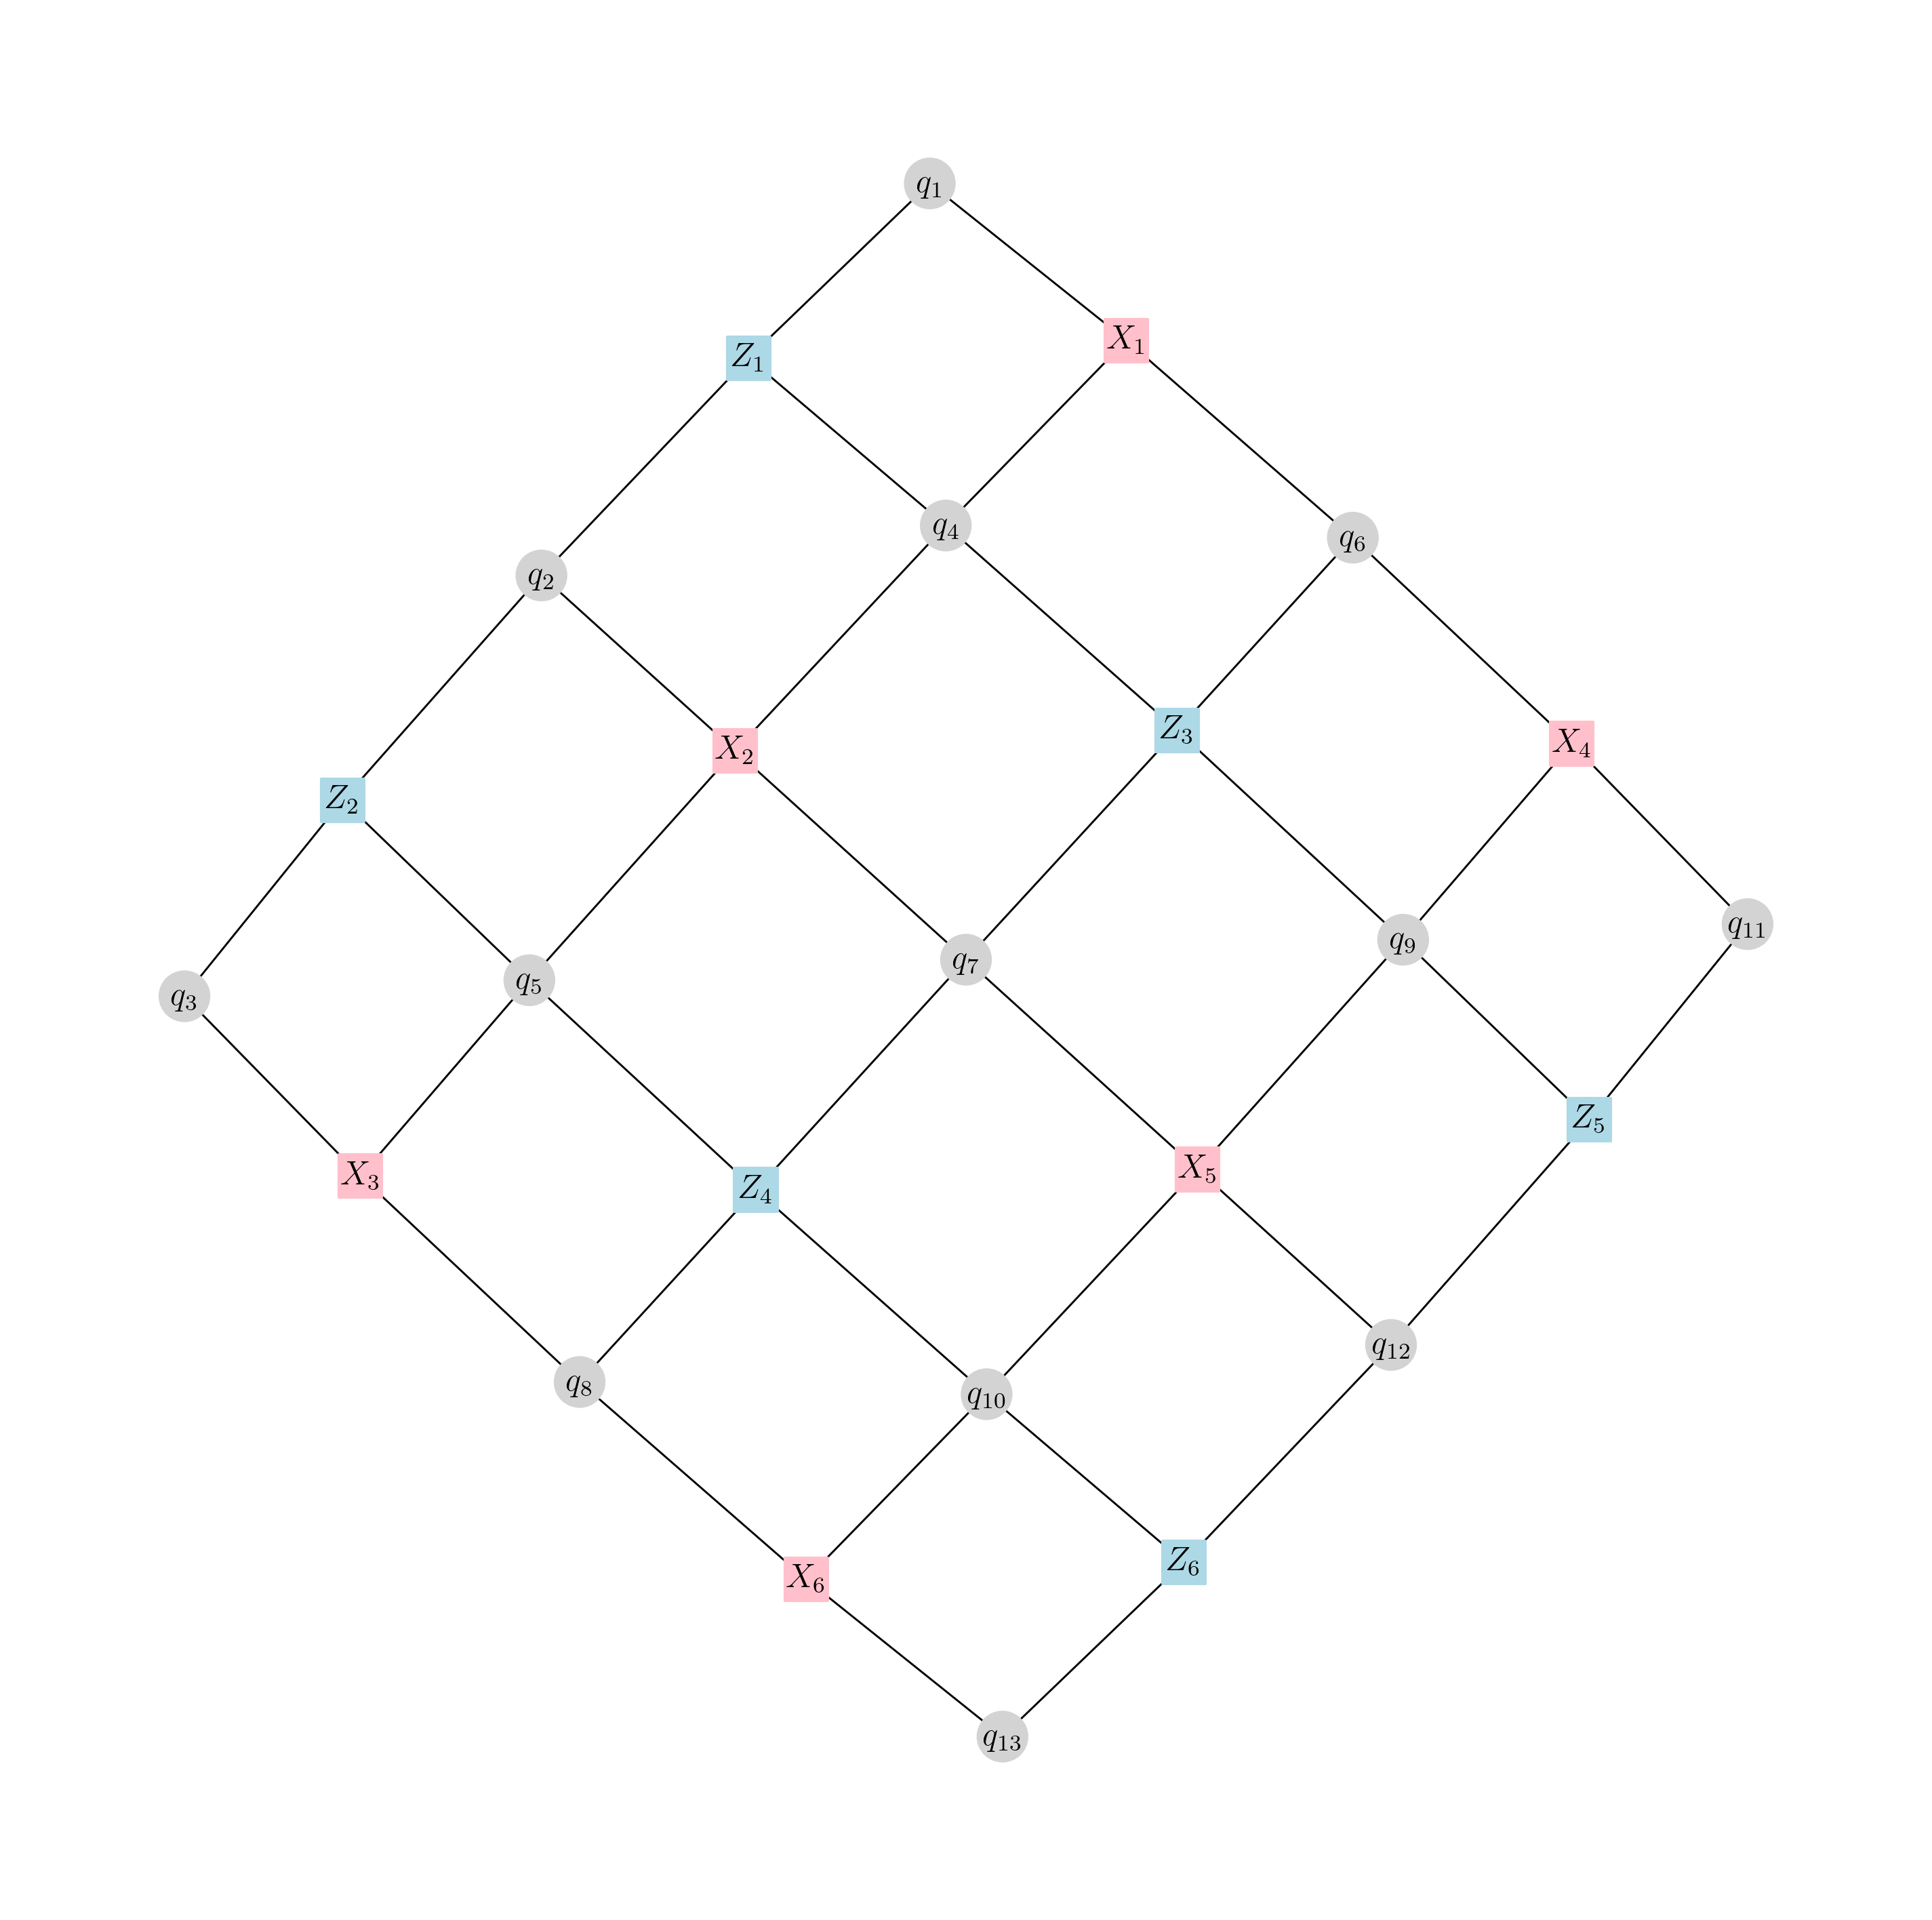

In [9]:
plt.figure(figsize=(12, 12))
hp_code_rep_3_rep_3.draw(with_labels=True)

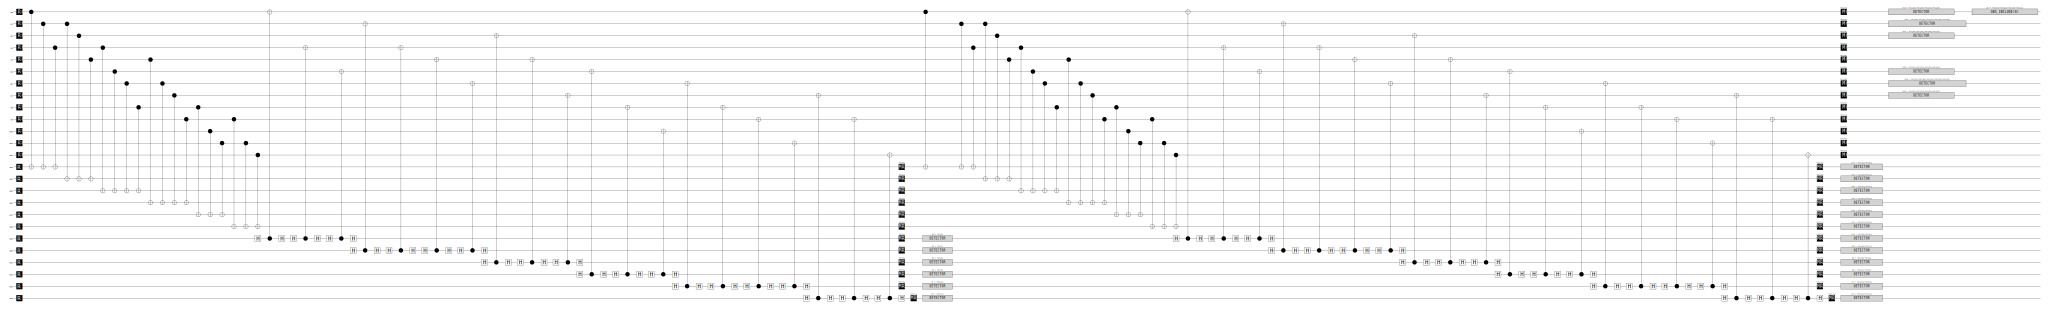

In [10]:
hp_code_rep_3_rep_3.circuit.without_noise().diagram("timeline-svg")

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(1, 0) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 0) 3
    QUBIT_COORDS(4, 0) 4
    QUBIT_COORDS(0, 1) 5
    QUBIT_COORDS(1, 1) 6
    QUBIT_COORDS(2, 1) 7
    QUBIT_COORDS(3, 1) 8
    QUBIT_COORDS(4, 1) 9
    QUBIT_COORDS(0, 2) 10
    QUBIT_COORDS(1, 2) 11
    QUBIT_COORDS(2, 2) 12
    QUBIT_COORDS(3, 2) 13
    QUBIT_COORDS(4, 2) 14
    QUBIT_COORDS(0, 3) 15
    QUBIT_COORDS(1, 3) 16
    QUBIT_COORDS(2, 3) 17
    QUBIT_COORDS(3, 3) 18
    QUBIT_COORDS(4, 3) 19
    QUBIT_COORDS(0, 4) 20
    QUBIT_COORDS(1, 4) 21
    QUBIT_COORDS(2, 4) 22
    QUBIT_COORDS(3, 4) 23
    QUBIT_COORDS(4, 4) 24
    RX 0 2 4 6 8 10 12 14 16 18 20 22 24
    R 1 3 5 7 9 11 13 15 17 19 21 23
    TICK
    DEPOLARIZE1(0.04) 0 2 4 6 8 10 12 14 16 18 20 22 24
    H 1 3 11 13 21 23
    TICK
    CX 1 2 11 12 21 22 3 4 13 14 23 24 6 5 16 15 8 7 18 17
    TICK
    CX 1 6 11 16 3 8 13 18 10 5 20 15 12 7 22 17 14 9 24 19
    TICK
    CX 11 6 21 16 13 8 23 18 0 5

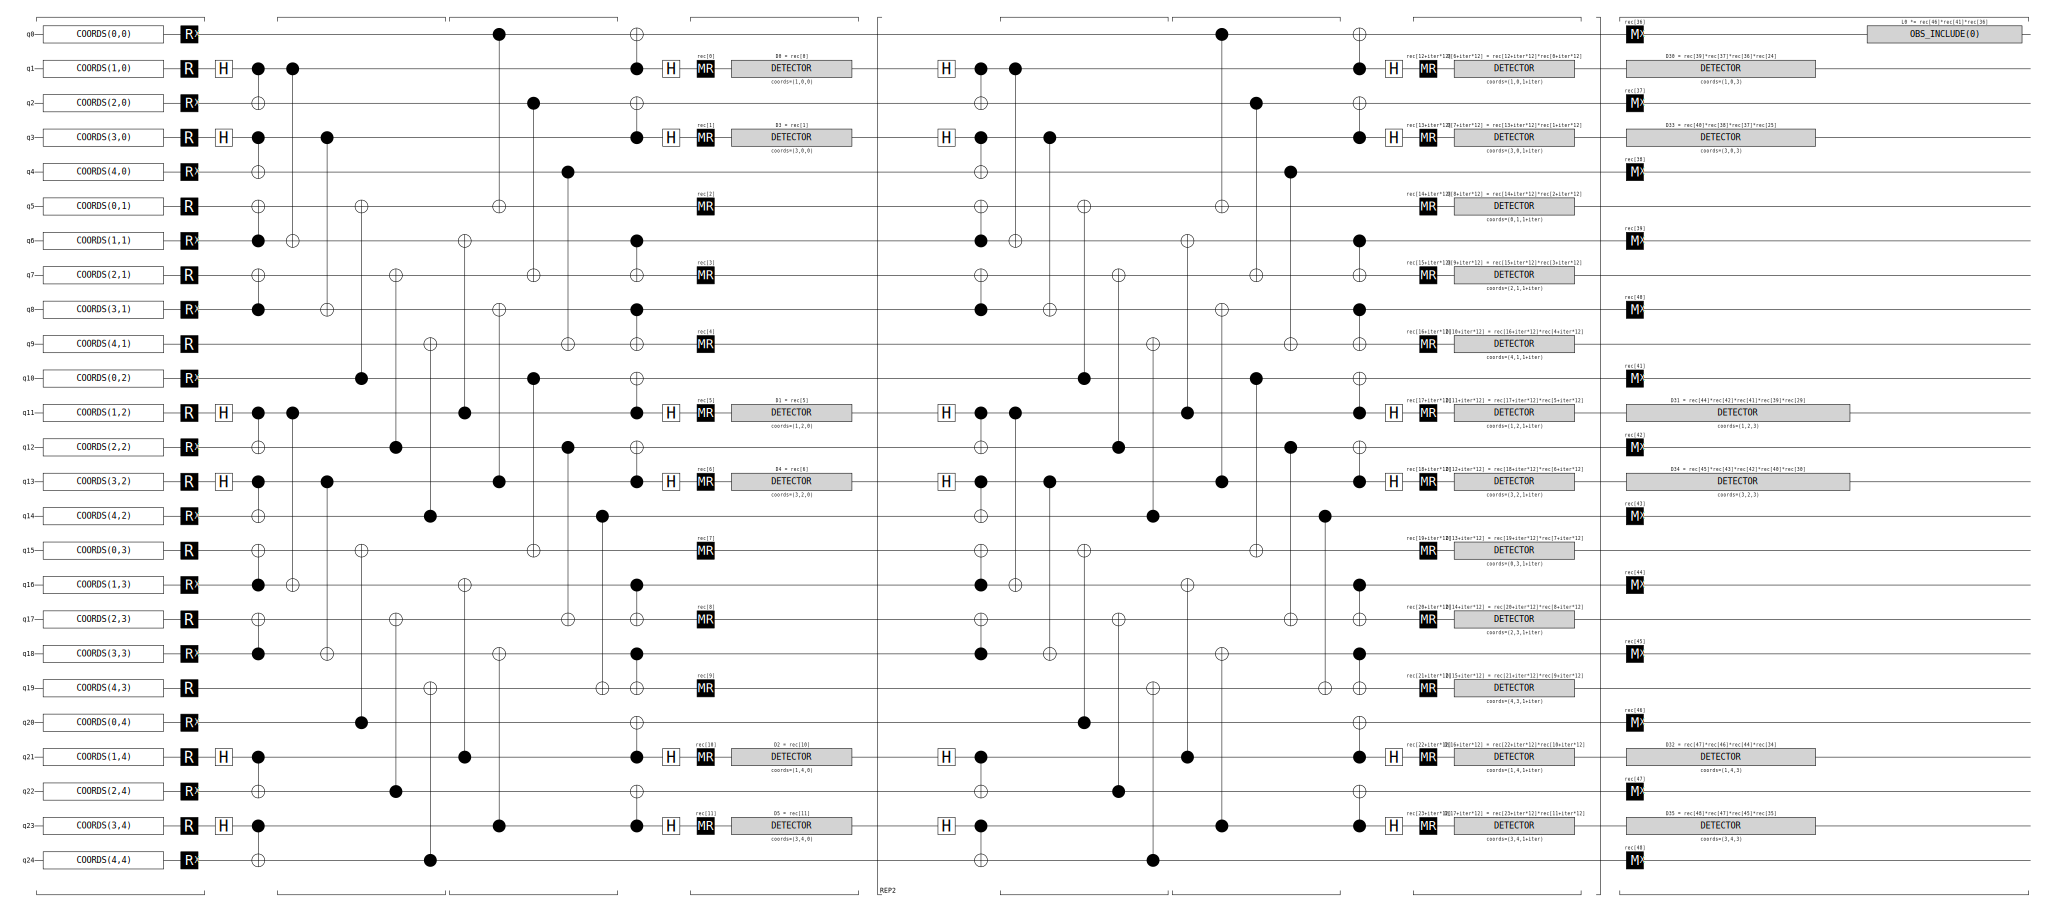

In [11]:
import stim

circuit = stim.Circuit.generated(
    "surface_code:unrotated_memory_x",
    rounds=3,
    distance=3,
    before_round_data_depolarization=0.04,
    before_measure_flip_probability=0.01)

print(repr(circuit))
circuit.without_noise().diagram('timeline-svg')

In [12]:
tasks_gen = [
    sinter.Task(
        circuit=stim.Circuit.generated(
            "surface_code:unrotated_memory_z",
            rounds=d * 3,
            distance=d,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'p': noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
]

collected_stats_gen: list[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=tasks_gen,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=500,
)

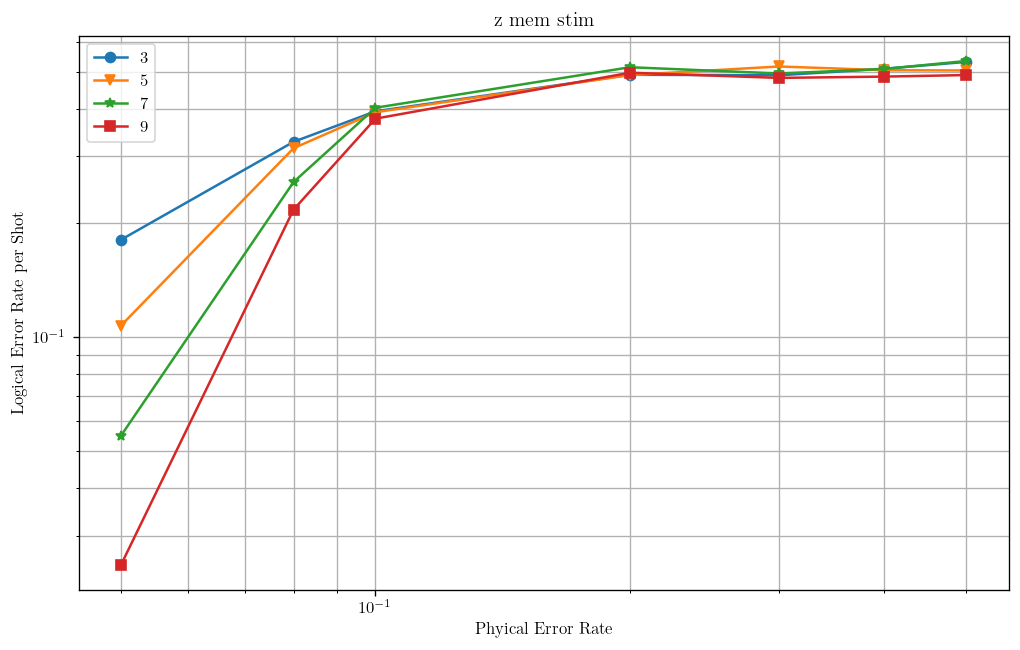

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats_gen,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
    highlight_max_likelihood_factor=1,
)
# ax.set_ylim(1e-4, 1e-0)
# ax.set_xlim(5e-2, 5e-1)
ax.loglog()
ax.set_title("z mem stim")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

In [25]:
tasks = [
    sinter.Task(
        circuit=wv.HypergraphProductCode(
            H1=wv.pcm.repetition(d),
            H2=wv.pcm.repetition(d),
            rounds=d * 3,
            experiment="z_memory",
            noise=wv.NoiseModel(data=noise),
        ).circuit,
        json_metadata={"d": d, "p": noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
]

collected_stats: list[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=tasks,
    decoders=["pymatching"],
    max_shots=100_000,
    max_errors=500,
)

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  5, 10])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 

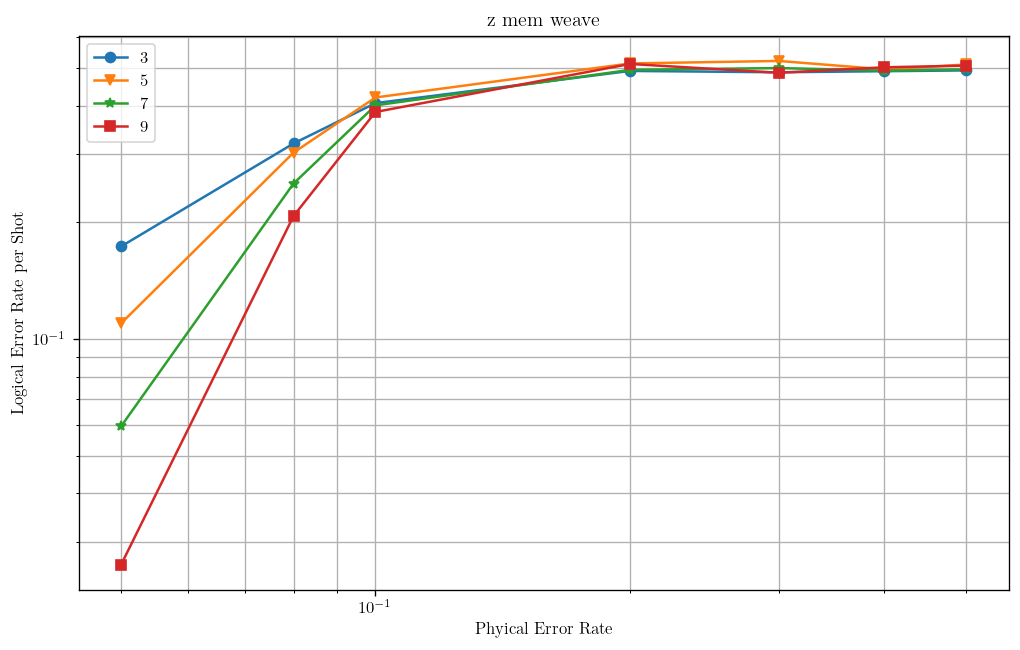

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
    highlight_max_likelihood_factor=1,
)
# ax.set_ylim(1e-4, 1e-0)
# ax.set_xlim(5e-2, 5e-1)
ax.loglog()
ax.set_title("z mem weave")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

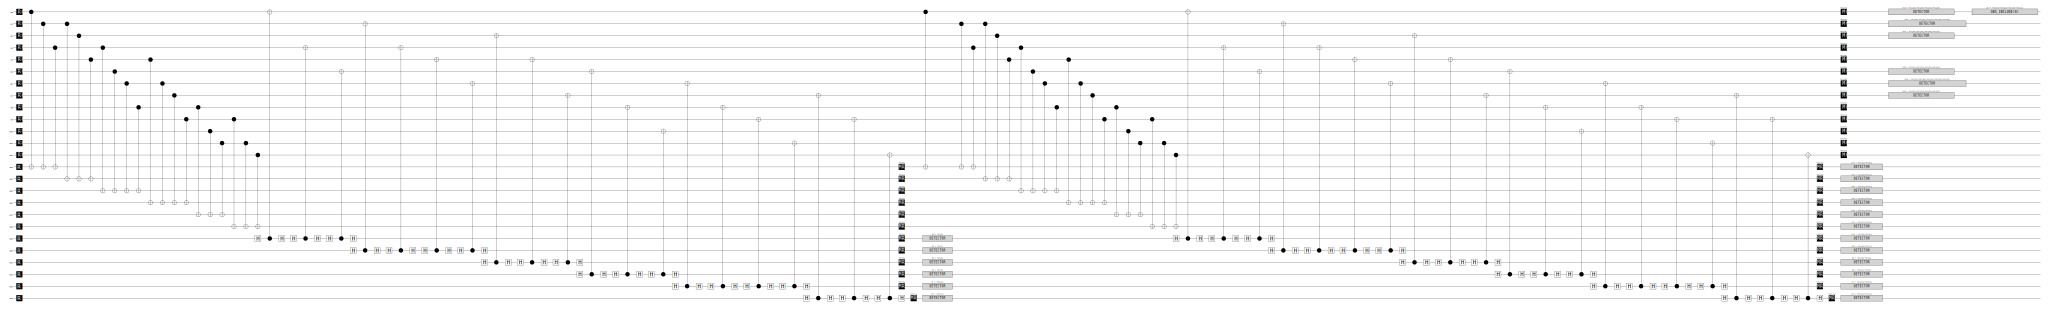

In [16]:
hp_code_rep_3_rep_3.circuit.without_noise().diagram("timeline-svg")

[Z Logical Operators]
Using 1/1 logical operators:
[array([0, 3])] 



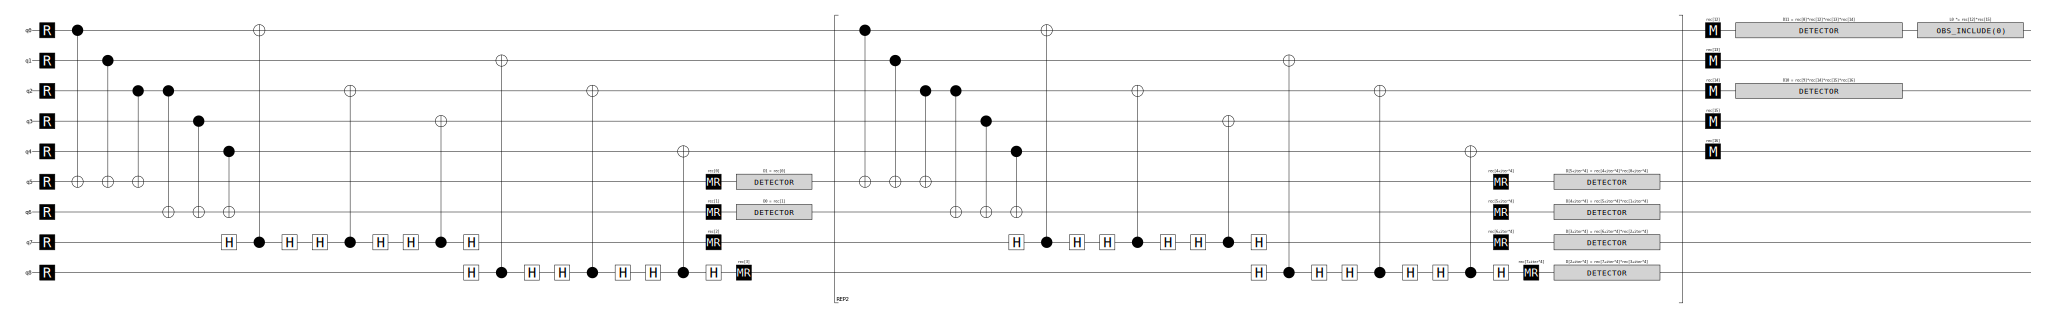

In [17]:
hp_code_rep_2_rep_2 = wv.HypergraphProductCode(
    H1=wv.pcm.repetition(2),
    H2=wv.pcm.repetition(2),
    rounds=3,
    experiment="z_memory",
)
hp_code_rep_2_rep_2.circuit.without_noise().diagram("timeline-svg")

[Z Logical Operators]
Using 1/1 logical operators:
[array([0, 3])] 



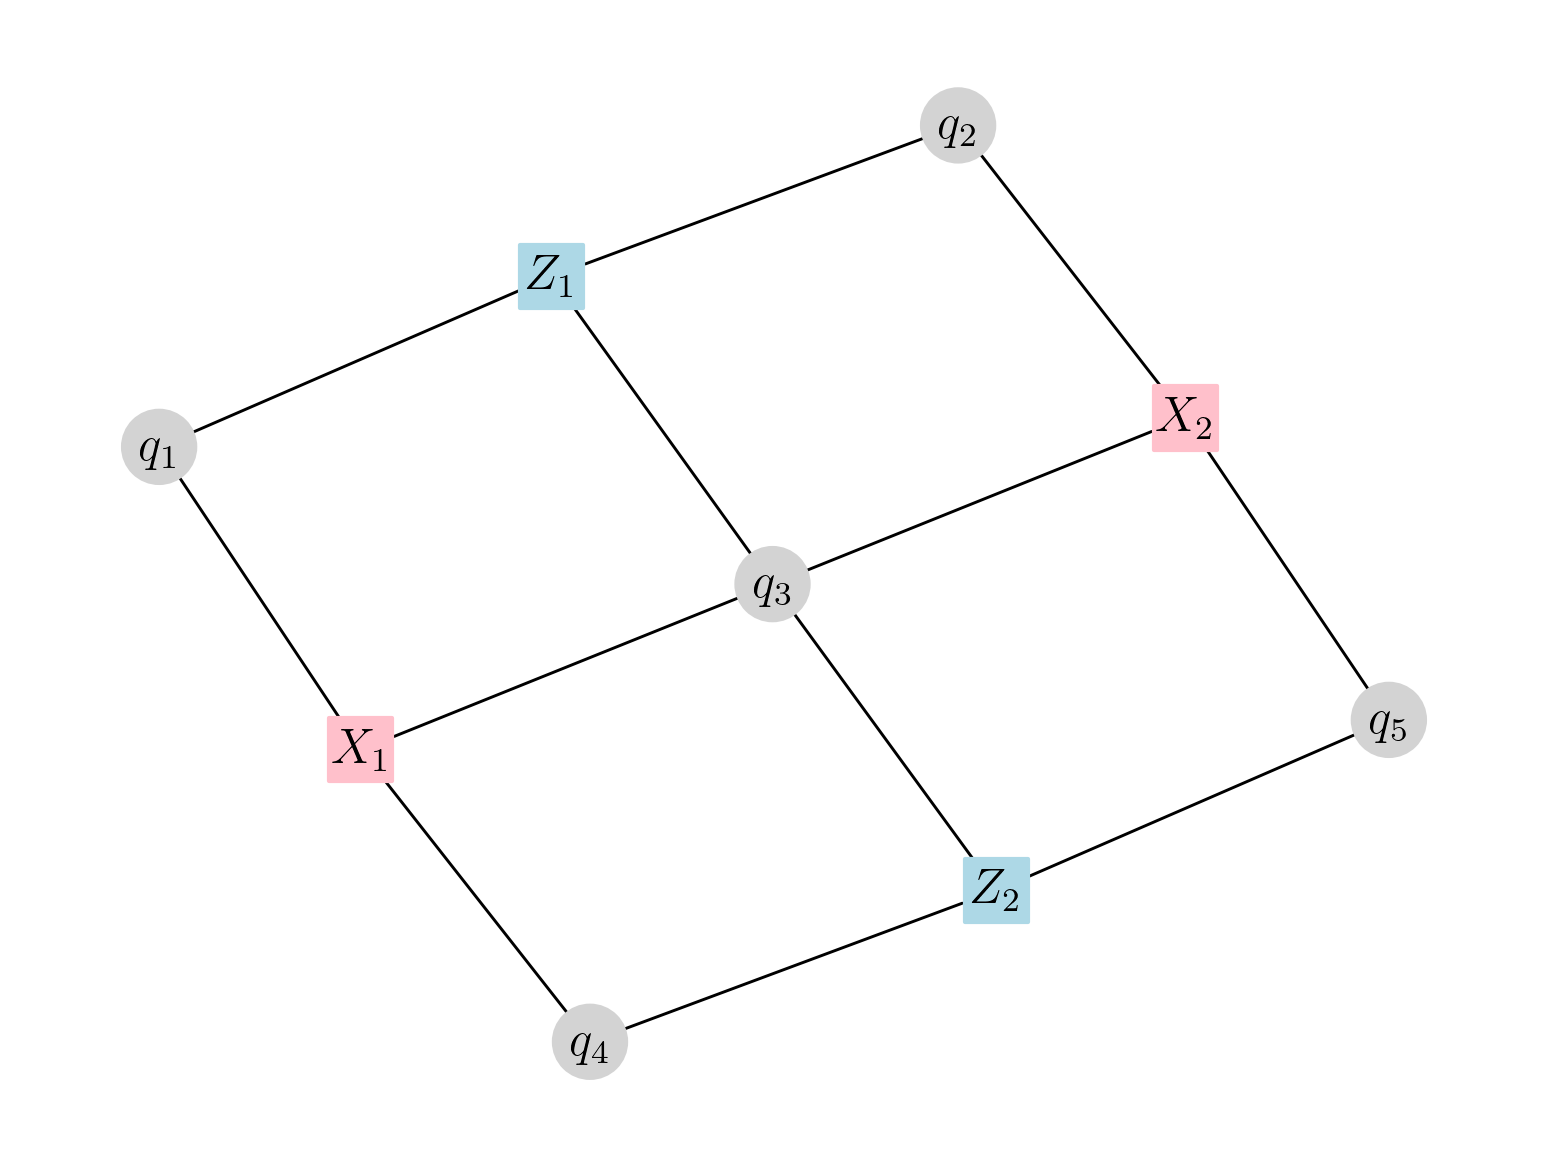

In [18]:
hp_code_rep_2_rep_2.embed("spring")
hp_code_rep_2_rep_2.draw(with_labels=True)

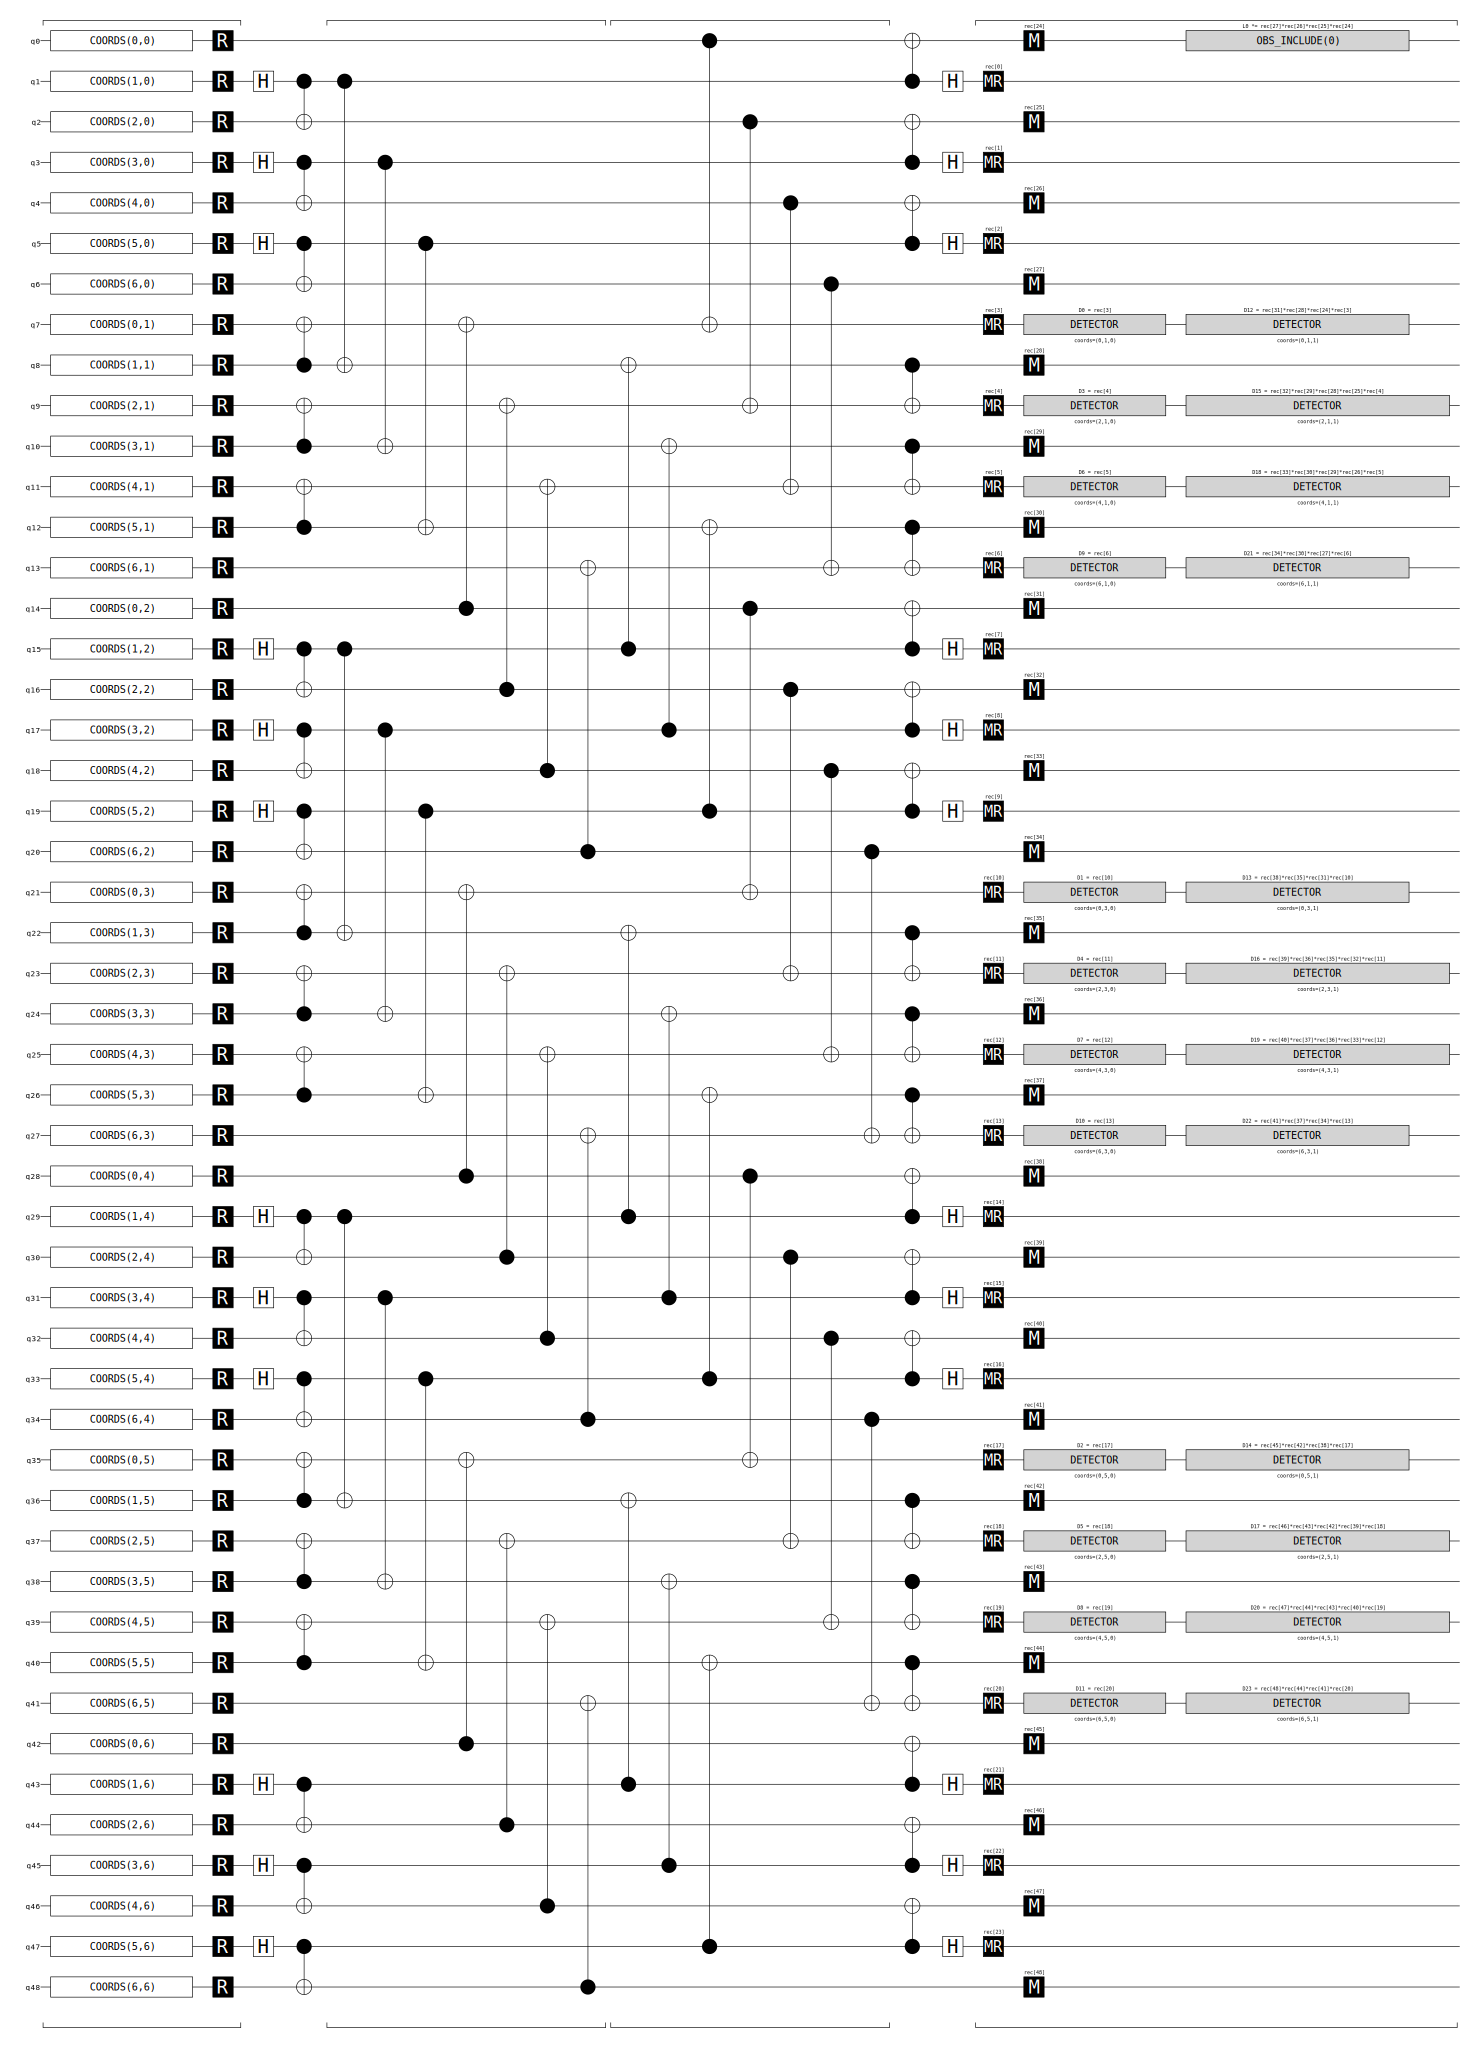

In [19]:
import stim
stim.Circuit.generated(
    "surface_code:unrotated_memory_z",
    rounds=1,
    distance=4,
    before_round_data_depolarization=0.1,
).without_noise().diagram("timeline-svg")

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  7, 14, 21])] 



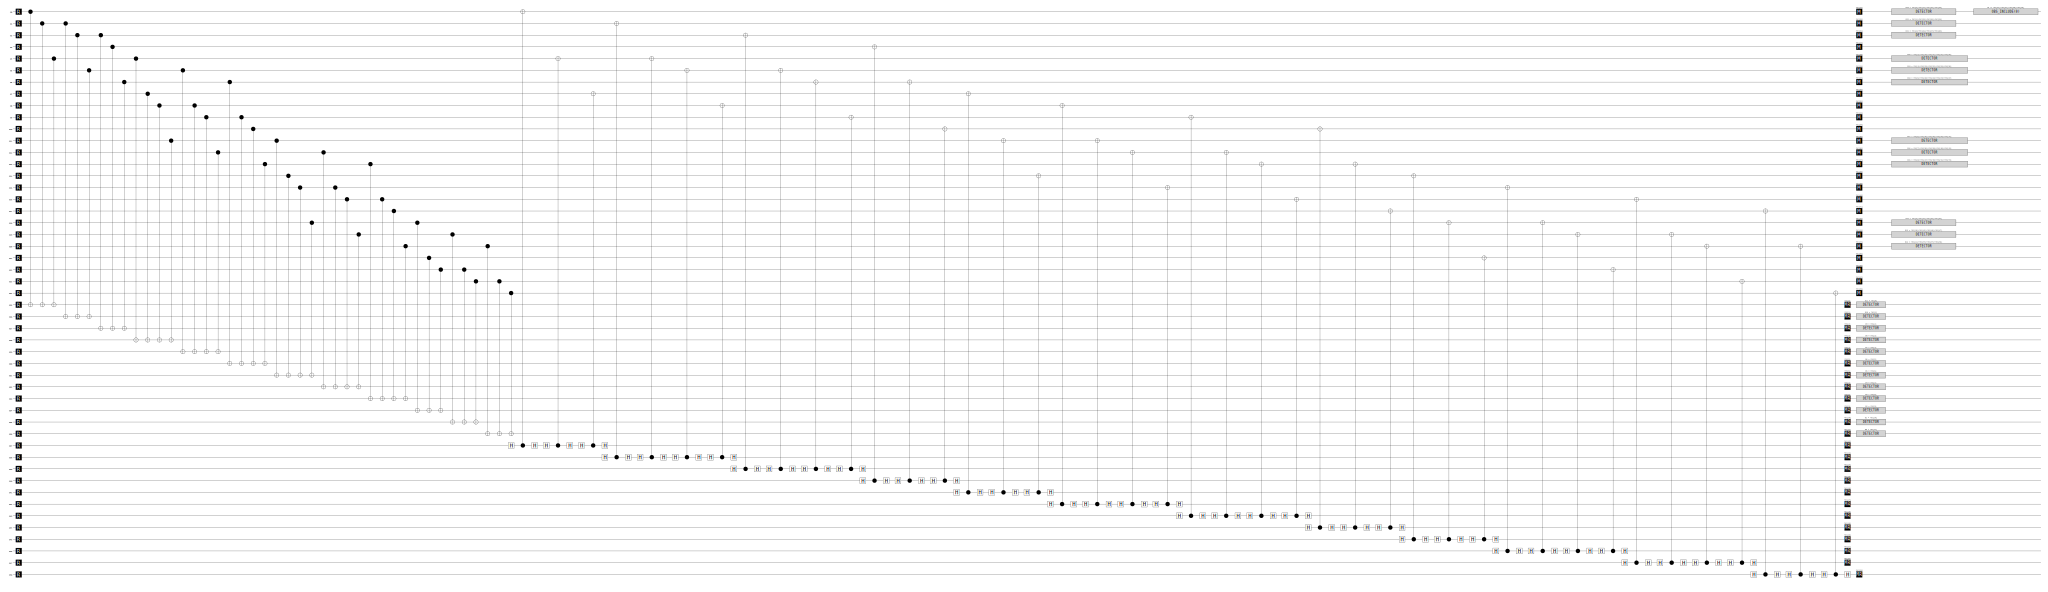

In [20]:
hp_code_rep_4_rep_4 = wv.HypergraphProductCode(
    H1=wv.pcm.repetition(4),
    H2=wv.pcm.repetition(4),
    rounds=1,
    experiment="z_memory",
)
hp_code_rep_4_rep_4.circuit.without_noise().diagram("timeline-svg")

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  7, 14, 21])] 



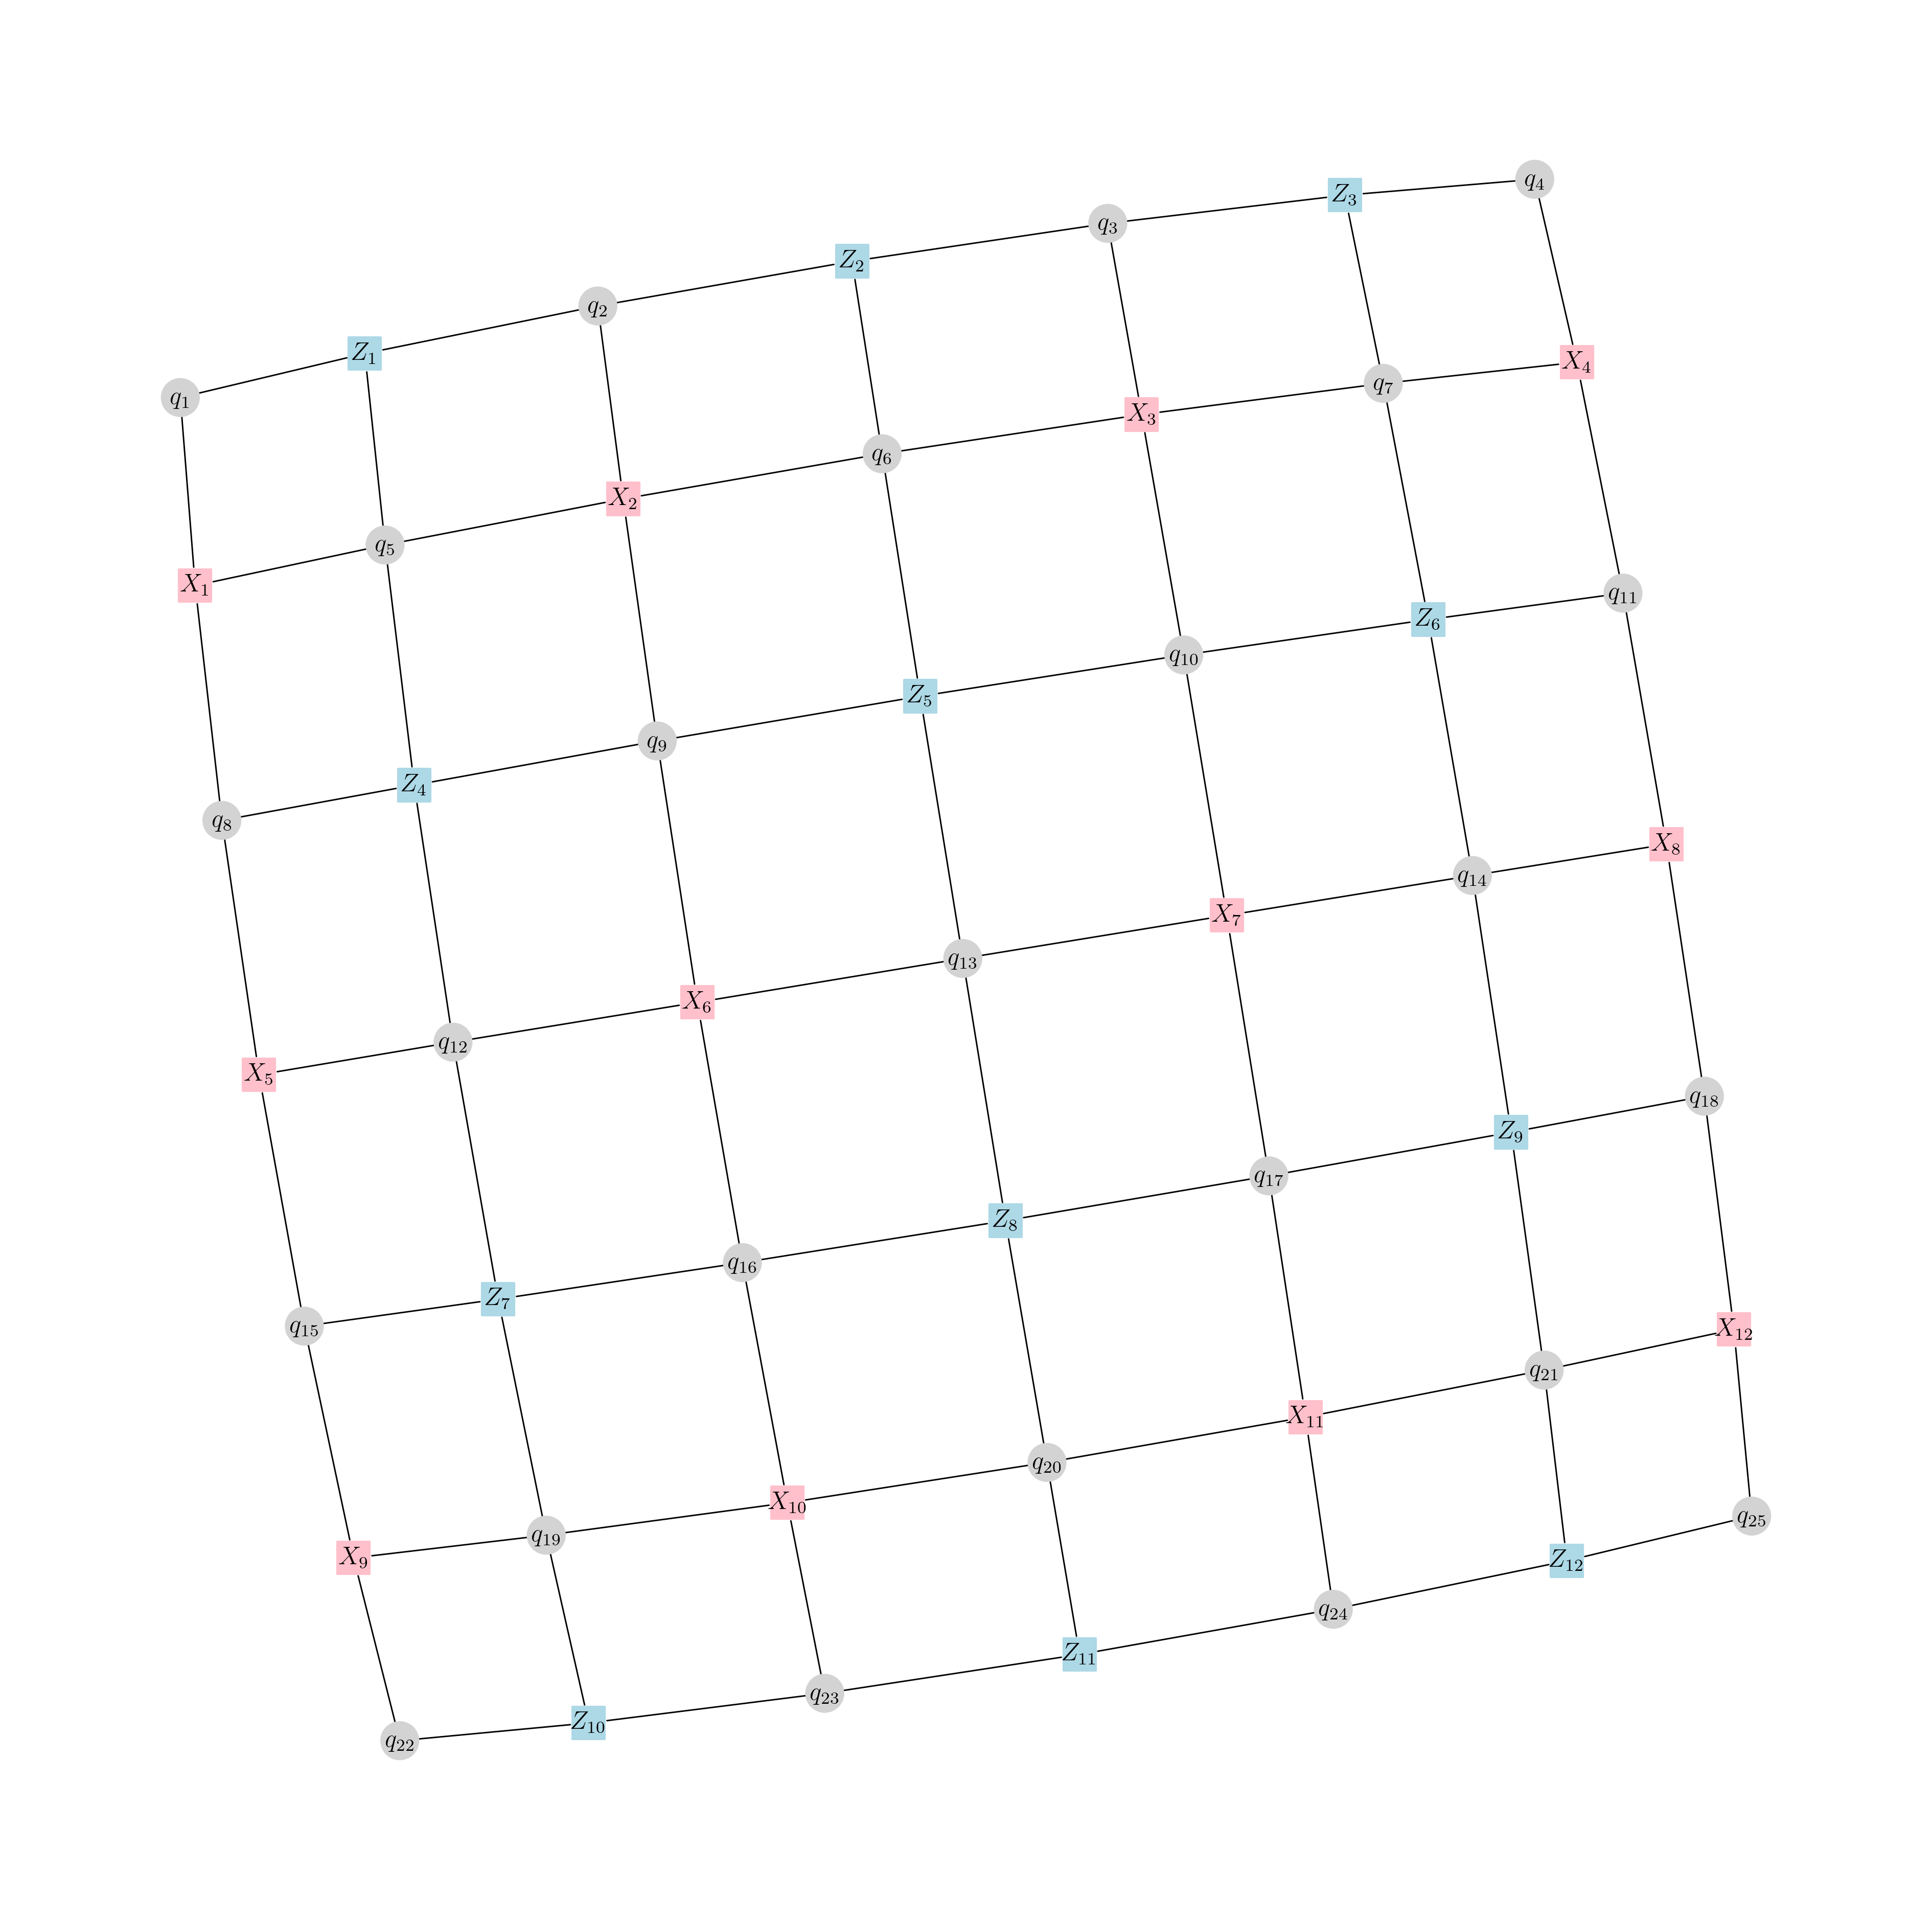

In [21]:
plt.figure(figsize=(16, 16))
hp_code_rep_4_rep_4.embed("spring")
hp_code_rep_4_rep_4.draw(with_labels=True)

In [22]:
hp_code_rep_5_rep_5 = wv.HypergraphProductCode(
    H1=wv.pcm.repetition(5),
    H2=wv.pcm.repetition(5),
    rounds=1,
    experiment="z_memory",
)
hp_code_rep_5_rep_5.embed("spring")

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 

[Z Logical Operators]
Using 1/1 logical operators:
[array([ 0,  9, 18, 27, 36])] 



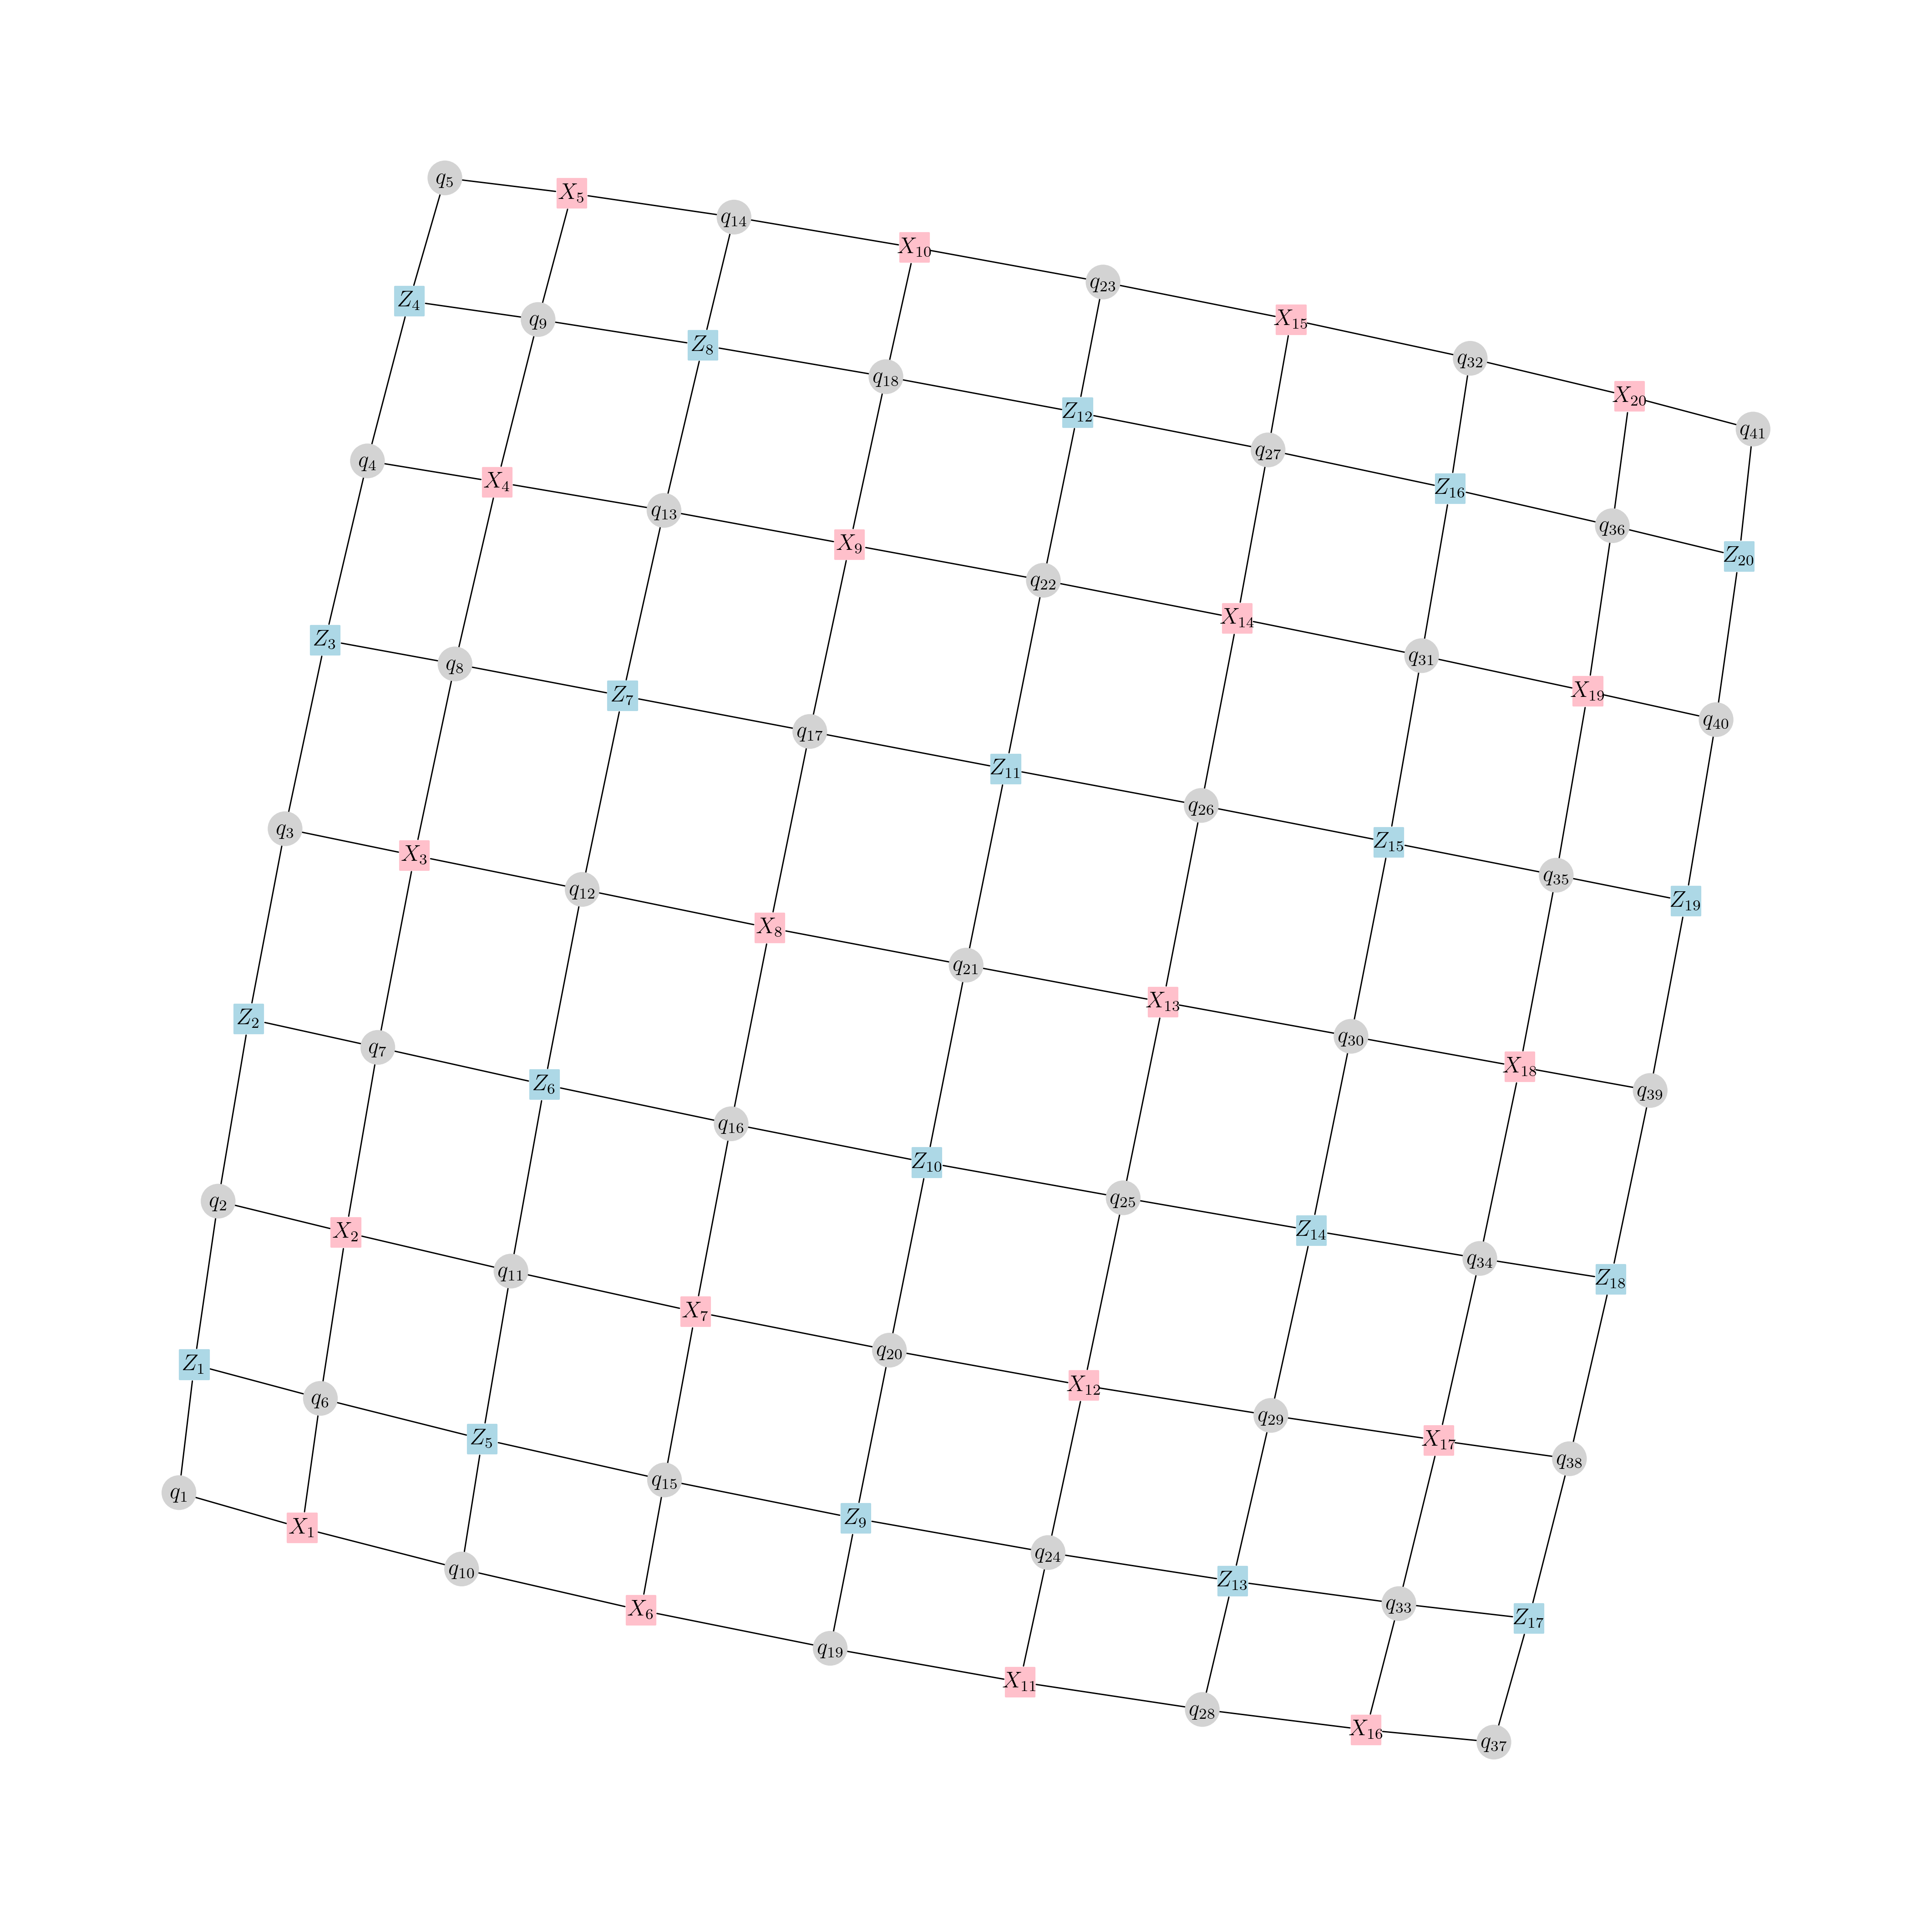

In [23]:
plt.figure(figsize=(18, 18))
hp_code_rep_5_rep_5.draw(with_labels=True)

In [24]:
wv.pcm.repetition(5)

array([[1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1]])